In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

url = 'https://raw.githubusercontent.com/vaibhavwalvekar/NYC-Flights-2013-Dataset-Analysis/master/flights.csv'
url1 = 'https://raw.githubusercontent.com/vaibhavwalvekar/NYC-Flights-2013-Dataset-Analysis/master/weather.csv'

flights = pd.read_csv(url, sep = ',')

weather = pd.read_csv(url1, sep = ',')
flights = flights.merge(weather, on=['year', 'month', 'day', 'hour', 'origin'], how='inner')

In [2]:
flights.head(10)

,Unnamed: 0_x,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,...,Unnamed: 0_y,temp,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib
0,20,2013,1,1,601.0,1.0,844.0,-6.0,B6,N644JB,...,6,39.02,26.06,59.37,270.0,10.35702,11.918651,0.0,1012.0,10.0
1,23,2013,1,1,606.0,-4.0,858.0,-12.0,AA,N633AA,...,6,39.02,26.06,59.37,270.0,10.35702,11.918651,0.0,1012.0,10.0
2,25,2013,1,1,607.0,0.0,858.0,-17.0,UA,N53442,...,6,39.02,26.06,59.37,270.0,10.35702,11.918651,0.0,1012.0,10.0
3,26,2013,1,1,608.0,8.0,807.0,32.0,MQ,N9EAMQ,...,6,39.02,26.06,59.37,270.0,10.35702,11.918651,0.0,1012.0,10.0
4,30,2013,1,1,615.0,0.0,833.0,-9.0,DL,N326NB,...,6,39.02,26.06,59.37,270.0,10.35702,11.918651,0.0,1012.0,10.0
5,31,2013,1,1,622.0,-8.0,1017.0,3.0,US,N807AW,...,6,39.02,26.06,59.37,270.0,10.35702,11.918651,0.0,1012.0,10.0
6,34,2013,1,1,624.0,-6.0,909.0,29.0,EV,N11107,...,6,39.02,26.06,59.37,270.0,10.35702,11.918651,0.0,1012.0,10.0
7,38,2013,1,1,628.0,-2.0,1016.0,29.0,UA,N33289,...,6,39.02,26.06,59.37,270.0,10.35702,11.918651,0.0,1012.0,10.0
8,41,2013,1,1,629.0,-1.0,824.0,-9.0,US,N426US,...,6,39.02,26.06,59.37,270.0,10.35702,11.918651,0.0,1012.0,10.0
9,42,2013,1,1,632.0,24.0,740.0,12.0,EV,N13553,...,6,39.02,26.06,59.37,270.0,10.35702,11.918651,0.0,1012.0,10.0


# 1. Зависимость средней задержки от месяца

Text(0,0.5,'средняя задержка')

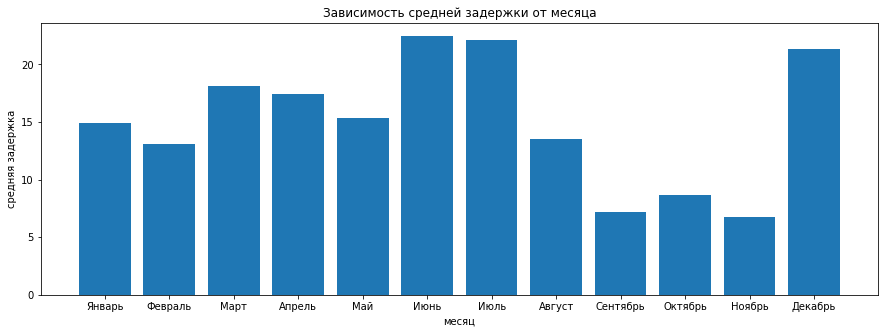

In [3]:
means = flights.groupby('month')['dep_delay'].mean()
means = means.sort_index()
l = ['Январь', 'Февраль', 'Март', 'Апрель', 'Май', 'Июнь', 'Июль', 'Август','Сентябрь', 'Октябрь', 'Ноябрь', 'Декабрь']
plt.figure(figsize = (15,5))
plt.bar(range(len(means)), means)
plt.xticks(range(len(means)), l)

plt.title('Зависимость средней задержки от месяца')
plt.xlabel('месяц')
plt.ylabel('средняя задержка')

В июне и в июле, когда колличество пассажиров увеличивается, а также в декабре,(возможно это связано с праздниками, отпусками, каникулами и т.д) средняя задержка выше среднего, из-за высокой загруженности, высокого спроса.

# 2. Зависимость задержек от авиакомпаний

Text(0,0.5,'Средняя задержка')

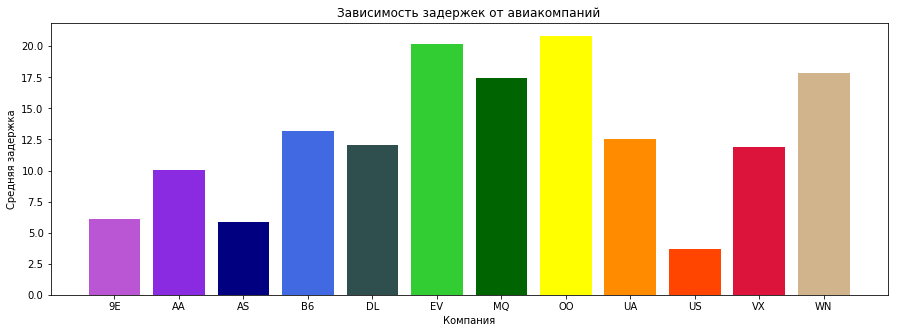

In [4]:
company = flights.groupby('carrier').mean()['dep_delay']
clr = ['mediumorchid', 'blueviolet', 'navy', 'royalblue', 'darkslategrey', 'limegreen', 'darkgreen', 'yellow', 'darkorange', 'orangered', 'crimson', 'tan']
plt.figure(figsize = (15,5))
plt.bar(range(len(company)), company, color = clr)
plt.xticks(range(len(company)), company.index)
plt.title('Зависимость задержек от авиакомпаний')
plt.xlabel('Компания')
plt.ylabel('Средняя задержка')

Наиболее склонны к задержкам перелеты у компании OO и EV

# 3. Влияние скорости ветра на задержки

Text(0,0.5,'Средняя задержка')

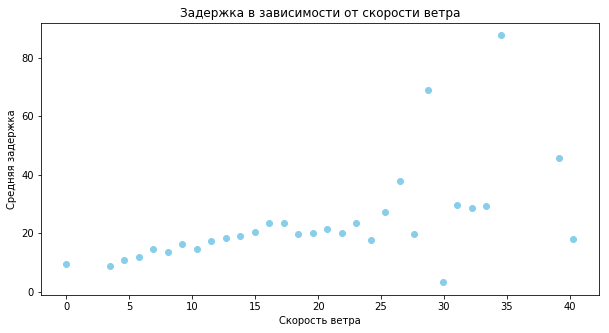

In [5]:
plt.figure(figsize = (10,5))

flights['wind_speed'] = flights.wind_speed

wind_delay = flights.groupby('wind_speed').mean()['dep_delay']
wind_delay = wind_delay.sort_index()
wind_delay = wind_delay.drop(labels=[wind_delay.index[-1]])
plt.scatter(wind_delay.index, wind_delay, color = 'skyblue')
plt.title('Задержка в зависимости от скорости ветра')
plt.xlabel('Скорость ветра')
plt.ylabel('Средняя задержка')

С увелечинем скорости ветра средние задержки имеют тенденцию к увеличению, но при этом сильный ветер не гарантирует задержку

# 4. Зависимость задержки от температуры

Text(0,0.5,'Задержка')

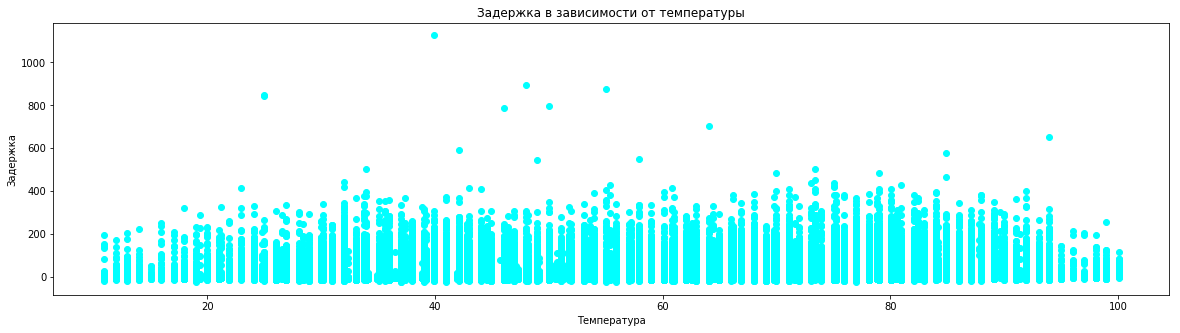

In [6]:
plt.figure(figsize = (20,5))

plt.scatter(flights['temp'],flights['dep_delay'], color = 'aqua')
plt.title('Задержка в зависимости от температуры')
plt.xlabel('Температура')
plt.ylabel('Задержка')

Температура не оказывает значительного влияния на задержки авиарейсов.
Продолжим исследовать влияние погодных условий

# 5. Влияние видимости на опоздание 

Text(0,0.5,'Среднее опоздание')

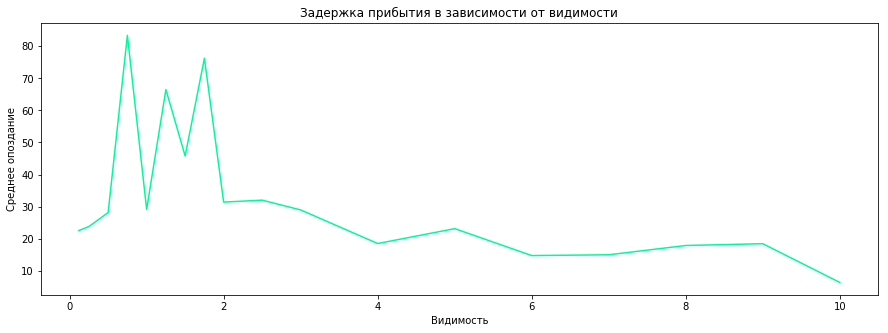

In [7]:
plt.figure(figsize = (15,5))

visib_delay = flights.groupby('visib').mean()['arr_delay']
plt.plot(visib_delay, color = 'mediumspringgreen')

plt.title('Задержка прибытия в зависимости от видимости')
plt.xlabel('Видимость')
plt.ylabel('Среднее опоздание')

Видимость оказывает значительное влияние на задержку авиарейсов, что вполне логично. Чем хуже видимость, тем больше задержка.

# 6. Зависимость опозданий от расстояния полета

Text(0,0.5,'Средняя задержка')

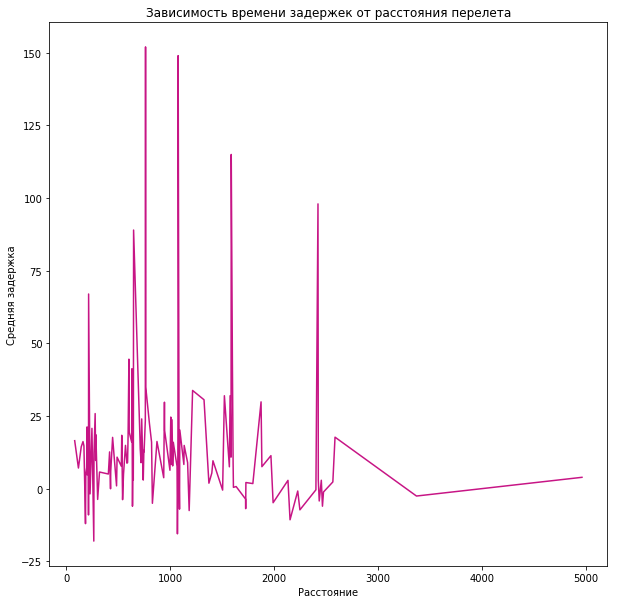

In [8]:
plt.figure(figsize=(10,10))

dist_delay = flights.groupby('distance')['arr_delay'].mean()
plt.plot(dist_delay, color = 'mediumvioletred')

plt.title('Зависимость времени задержек от расстояния перелета')
plt.xlabel('Расстояние')
plt.ylabel('Средняя задержка')

Чаще всего с наибольшим опозданием прилетают самолеты, преодолевающие небольшие дистанции. Чем больше расстояние, тем меньше время опоздания.

# 7. Средняя задержка рейсов в зависимости от времени суток

Text(0,0.5,'Средняя задержка')

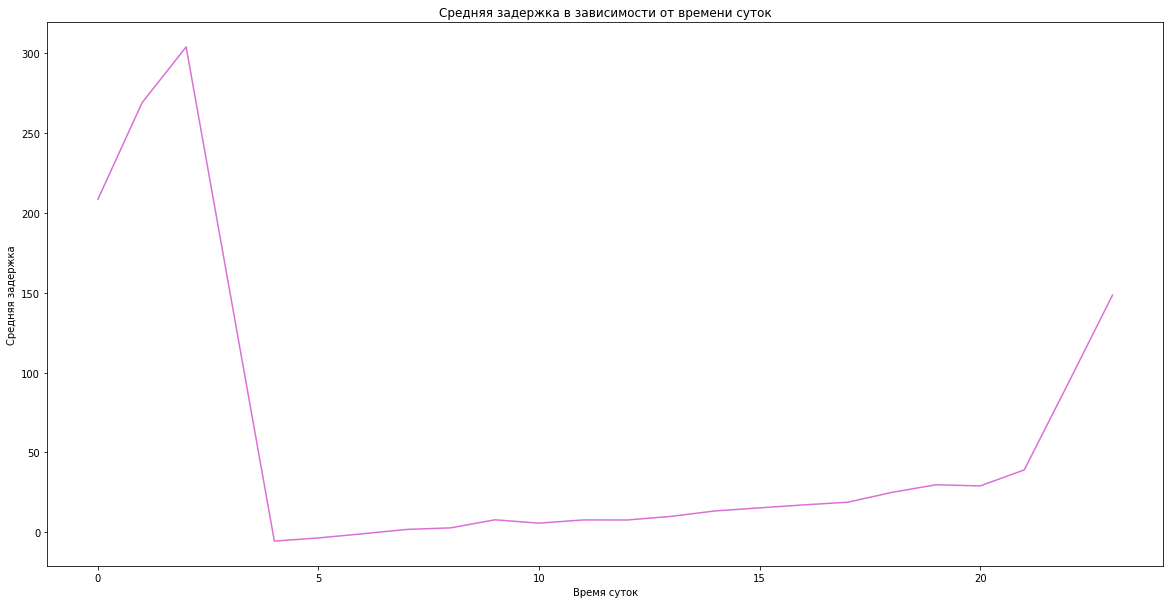

In [9]:
plt.figure(figsize=(20,10))
time_delay = flights.groupby('hour')['dep_delay'].mean()
time_delay.plot(color='orchid')
plt.title('Средняя задержка в зависимости от времени суток')
plt.xlabel('Время суток')
plt.ylabel('Средняя задержка')

Большинство задержек приходится на ночь. Возможно это связано с темным временем суток, с концом дня, усталостью людей. Усталость может сказаться на рассеяности и т.д, что в свою очередь может повлечь задержку вылета.

# 8. Частота опозданий

Text(0.5,1,'Частота задержек')

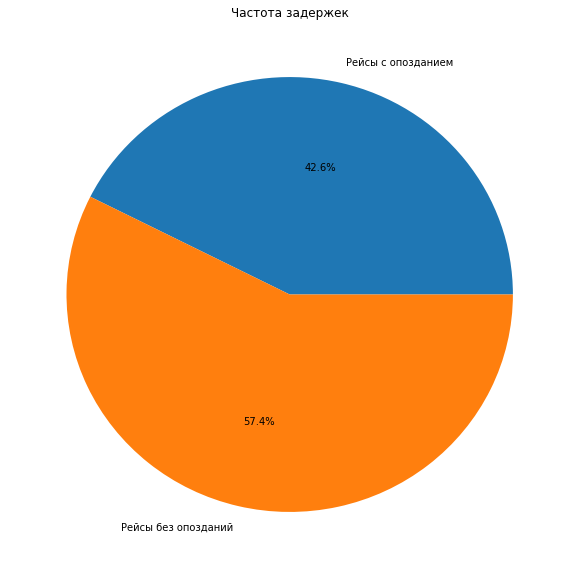

In [10]:
delay = flights.arr_delay > 0
plt.figure(figsize=(10,10))
plt.pie([delay.sum(), flights.shape[0] - delay.sum()], labels=['Рейсы с опозданием', 'Рейсы без опозданий'], autopct='%1.1f%%')
plt.title('Частота задержек')

Чуть меньше половины рейсов прилетают с опозданием. Частота опозданий может быть связана как с погодными условиями, так и с работой аэропортов, поэтому стоит сотрудничать с надежными аэропортами, чтобы факторов, влияющих на опоздание было меньше. Таким образом авиакомпании будут более пунктаульными.

# 9. Частота задержек

Text(0.5,1,'Частота задержек')

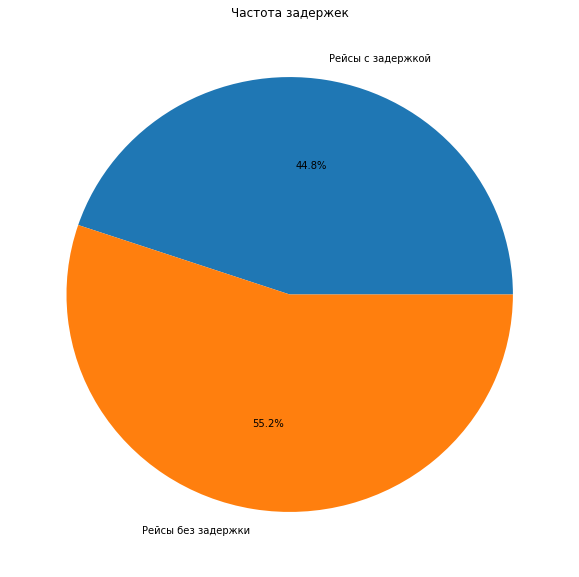

In [11]:
delay = flights.dep_delay > 0
plt.figure(figsize=(10,10))
plt.pie([delay.sum(), flights.shape[0] - delay.sum()], labels=['Рейсы с задержкой', 'Рейсы без задержки'], autopct='%1.1f%%')
plt.title('Частота задержек')

Почти половина рейсов вылетают с задержкой. Возможно стоит уделить большее внимание подготовке к вылету сотрудникам аэропортов.

# Пунктуальные и непунктуальные аэропорты

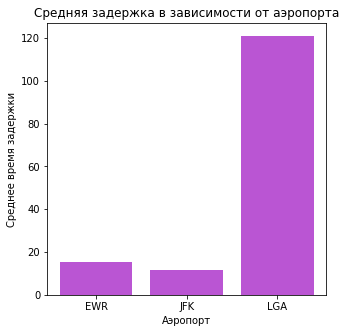

In [28]:
plt.figure(figsize=(5,5))
airp = flights.groupby('origin')['dep_delay'].mean()
plt.bar(np.arange(3), airp, color = 'mediumorchid')
plt.xticks(np.arange(3), ('EWR','JFK','LGA'))
plt.title('Средняя задержка в зависимости от аэропорта')
plt.xlabel('Аэропорт')
plt.ylabel('Среднее время задержки')
plt.show()

Лучше всего  сотрудничать с аэропортом JFK! Самый пунктуальный аэропорт. 